In [80]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [81]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [82]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [84]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [85]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [86]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [87]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [88]:
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64>

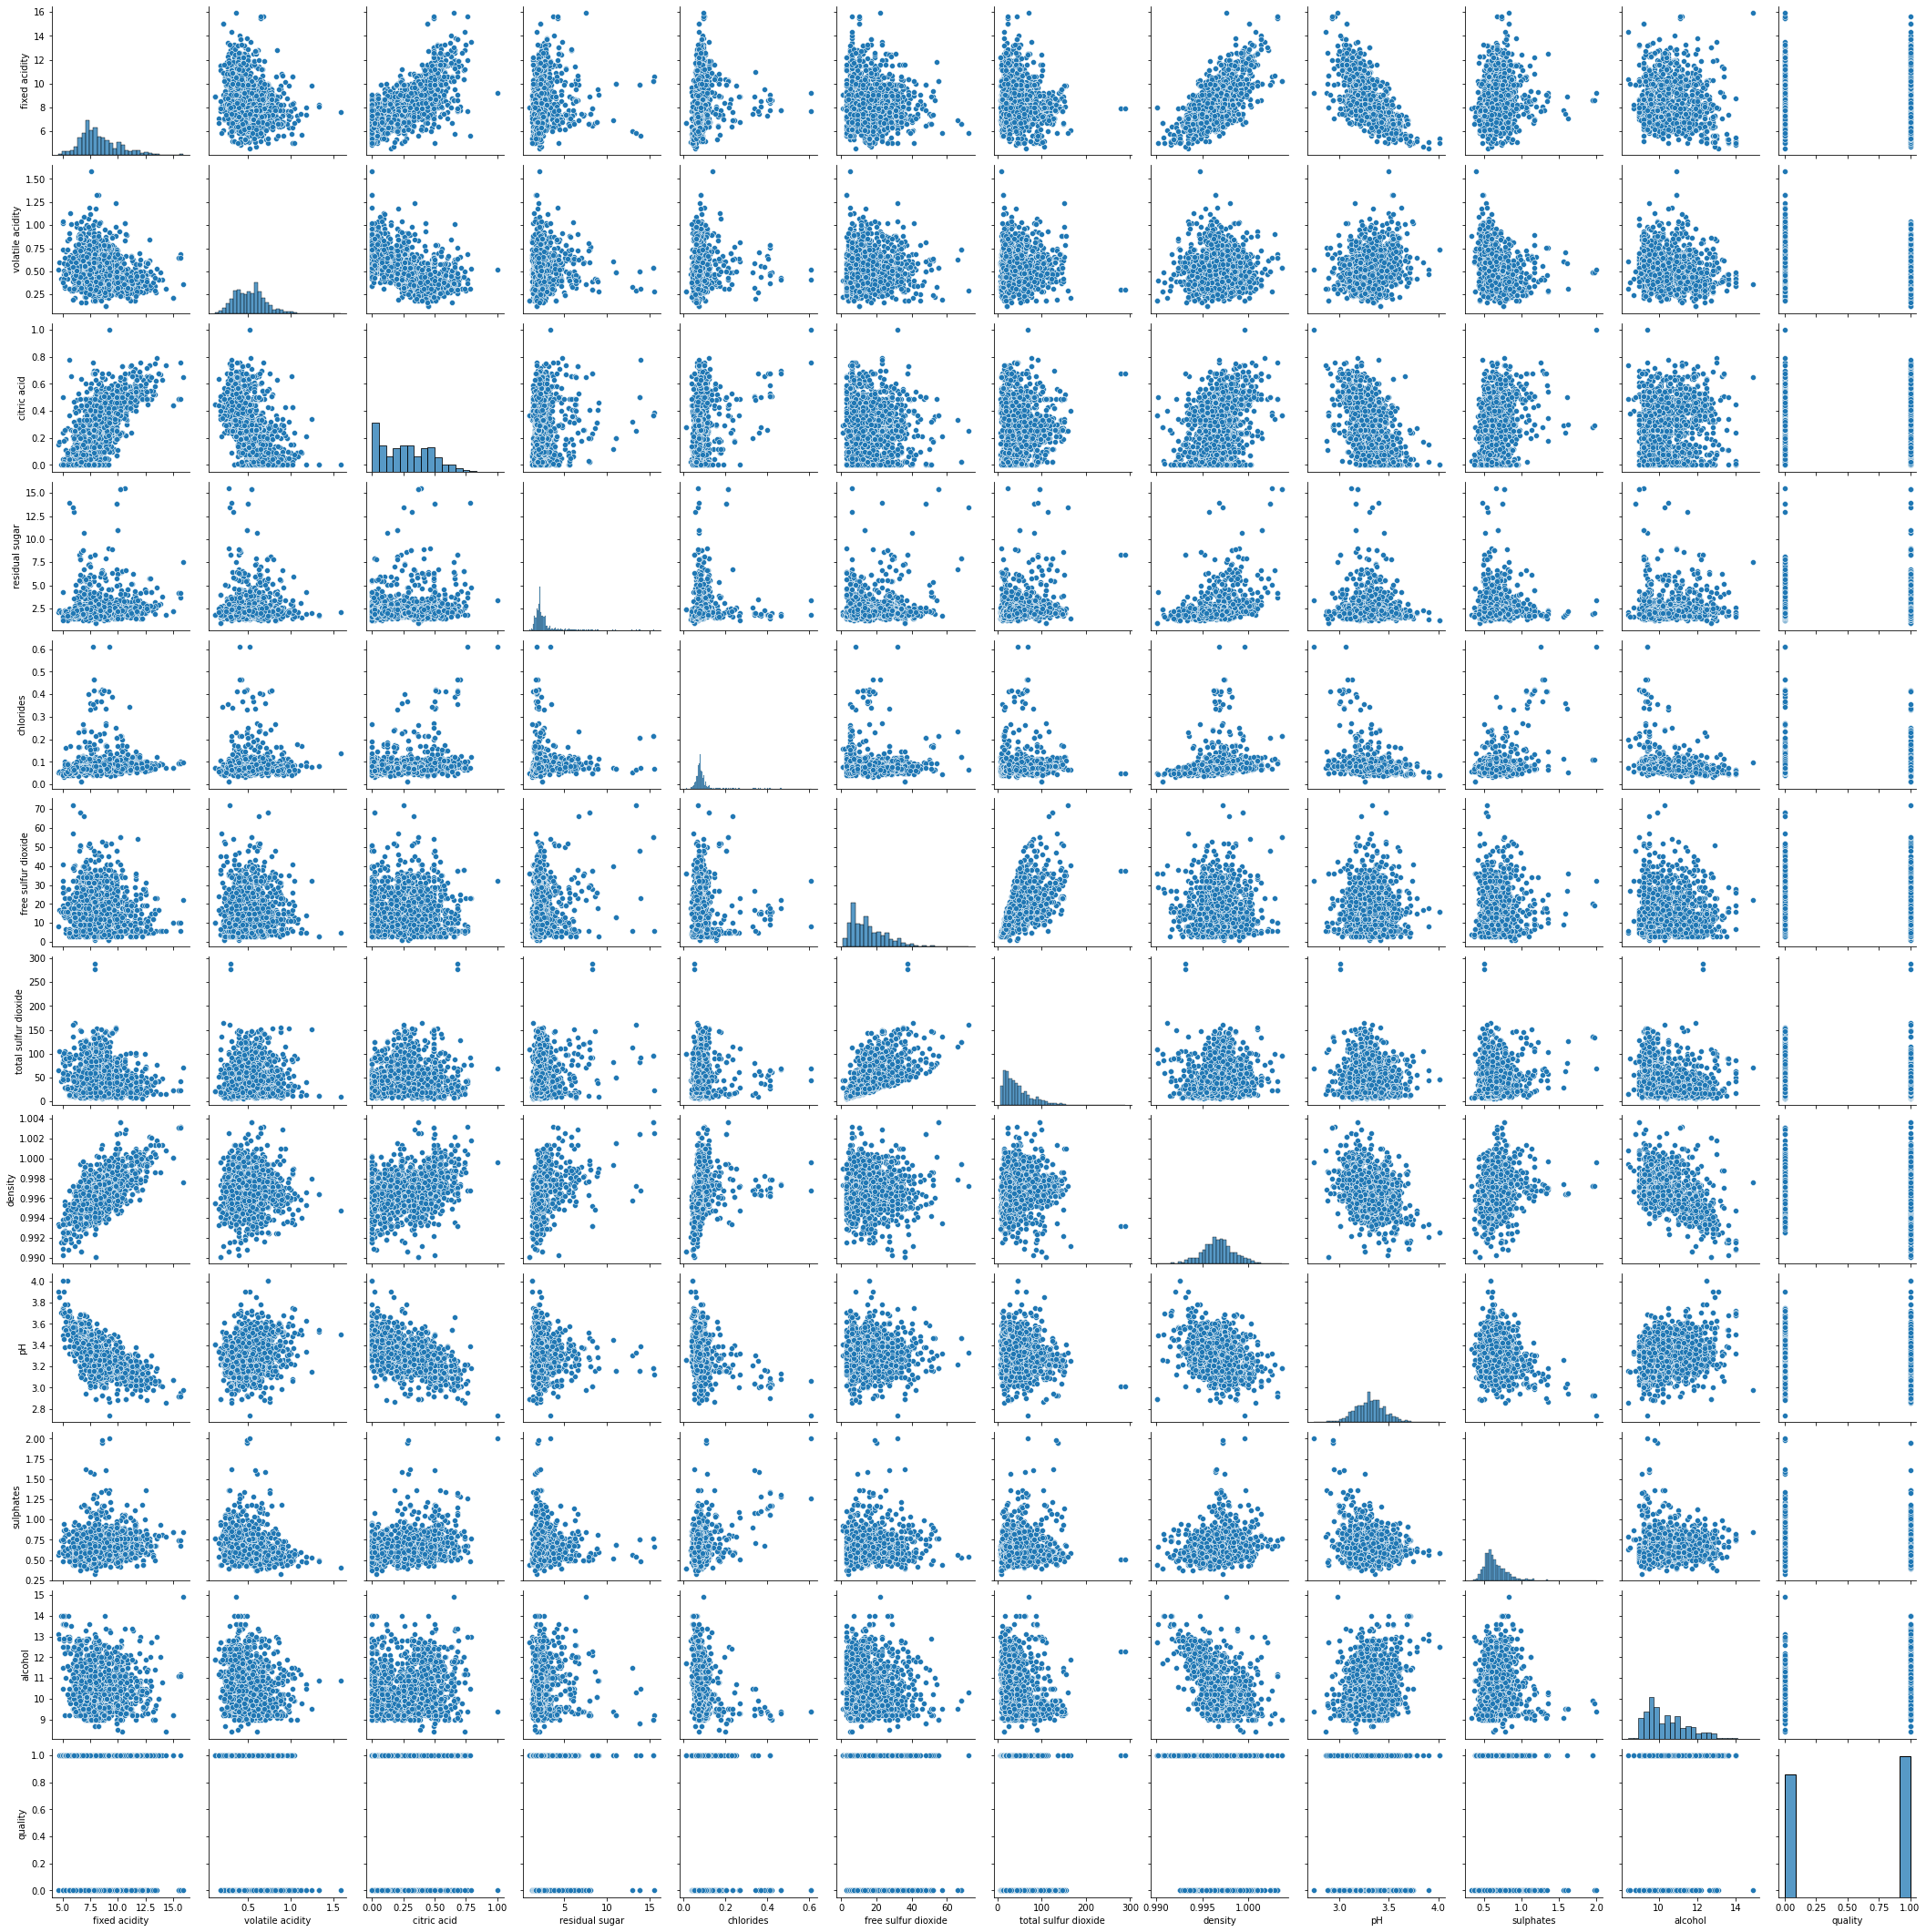

In [91]:
sns.pairplot(data)

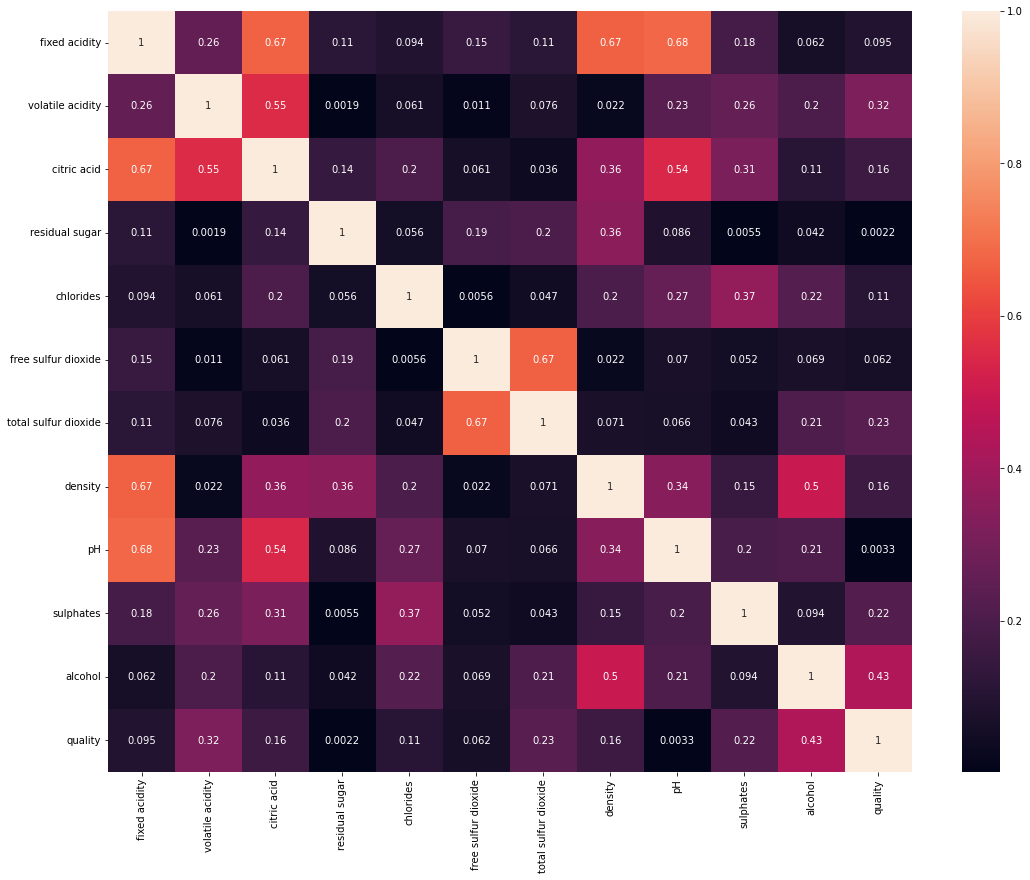

In [92]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size':10})
plt.show()

In [93]:
X=data.drop(columns=['quality'])       
y=data['quality']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=41)

In [95]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [96]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [97]:
clf.score(x_train,y_train)

1.0

In [98]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.78

In [102]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [103]:
grid_search=GridSearchCV(estimator=clf,
                         param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [106]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [107]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=80,min_samples_split=5,max_depth=10,min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=80, min_samples_leaf=2,
                       min_samples_split=5)

In [108]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.76

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [110]:
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [112]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[125  46]
 [ 59 170]]
73.75


In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [114]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[145  26]
 [ 41 188]]
83.25


In [115]:
from sklearn.svm import SVC
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [116]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)


[[145  26]
 [ 41 188]]
83.25


In [117]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc=rf.predict(x_test)

In [118]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[145  26]
 [ 41 188]]
83.25
